<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Special_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Special Topics - Part 2

Introduction to QuTiP - The Quantum Toolbox in Python
=====================================

QuTiP is a python package for calculations and numerical simulations of quantum systems.

It includes facilities for representing and doing calculations with quantum objects such state vectors (wavefunctions), as bras/kets/density matrices, quantum operators of single and composite systems, and superoperators (useful for defining master equations).

It also includes solvers for a time-evolution of quantum systems, according to: Schrodinger equation, von Neuman equation, master equations, Floquet formalism, Monte-Carlo quantum trajectors, experimental implementations of the stochastic Schrodinger/master equations.

For more information see the project web site at https://qutip.org/, and the documentation at https://qutip.org/docs/latest/index.html. Follow the instructions there in order to download and install QuTiP.




To use QuTiP in a Python program, first inlude the `qutip` module:

In [ ]:
import numpy as np
from qutip import *

### Creating and inspecting quantum objects

We can create a new quantum object using the `Qobj` class constructor, like this:

In [ ]:
q = Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Here we passed python list as an argument to the class constructor. The data in this list is used to construct the matrix representation of the quantum objects, and the other properties of the quantum object is by default computed from the same data.

We can inspect the properties of a `Qobj` instance using the following class method:

In [ ]:
# the dimension, or composite Hilbert state space structure
q.dims

[[2], [1]]

In [ ]:
# get the dense matrix representation
q.full()

array([[1.+0.j],
       [0.+0.j]])

In [ ]:
# some additional properties
q.isherm, q.type

(False, 'ket')

### Using `Qobj` instances for calculations

With `Qobj` instances we can do arithmetic and apply a number of different operations using class methods:

In [ ]:
sy = Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator

sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [ ]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator

sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [ ]:
# some arithmetic with quantum objects

H = 1.0 * sz + 0.1 * sy

print("Two-Level Hamiltonian (qubit) = \n")
H

Two-Level Hamiltonian (qubit) = 



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

In [ ]:
# The raw data of H can be extracted and put into a numpy array as follows
H.full()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [ ]:
# The hermitian conjugate
sy.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [ ]:
# The trace
H.tr()

0.0

In [ ]:
# Eigen energies
H.eigenenergies()

array([-1.,  1.])

## States and operators

Normally we do not need to create `Qobj` instances from stratch, using its constructor and passing its matrix representation as argument. Instead we can use functions in QuTiP that generates common states and operators for us. Here are some examples of built-in state functions. These obtain matrix representations of states and observables in the so-called "*Bosonic Occupation Number Representation*", which is basically the basis given by

\begin{equation*}
|n_1, n_2, n_3, \dots n_N\rangle.
\end{equation*}

In this state, $n_i$ identical bosons populate state $i$, and there are $N$ single particle states in total.
### State vectors

In [ ]:
# Fundamental basis states (Fock states of oscillator modes)

N = 2 # number of single particle states
n = 1 # the state that will be occupied

basis(N, n)    # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [ ]:
# Fundamental basis states (Fock states of oscillator modes)

N = 4 # number of states in the Hilbert space
n = 2 # the state that will be occupied

basis(N, n)    # equivalent to fock(N, n)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

### Operators

#### Qubit (two-level system) operators

In [ ]:
# Pauli sigma x
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [ ]:
# Pauli sigma y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [ ]:
# Pauli sigma z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

#### Creation and Annihilation operators

In [ ]:
# creation operator for N=8 particles
N=8
create(N) # equivalent to destroy(5).dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

#### Using `Qobj` instances we can check some well known commutation relations:

In [ ]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

Now, let us create a creation operator and an annihilation operator and prove that they commute, *i.e*

\begin{equation*}
\left[a, a^\dagger\right] = a\;a^\dagger - a^\dagger a = 1
\end{equation*}

In [ ]:
N = 10

#Annihilation operator
a = destroy(N)

print(commutator(a, a.dag()))

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -9.]]


**Oops...** The result is not exactly identity (look at the last element)! Why? Because we have truncated the Hilbert space at $10$ particles, but the exact Hilbert space has infinite particles. The last $-9$ is a **truncation error**. As long as our truncation is reasonably large, this should not pose a serious problem.

What about the algebra of spin operators? Let us prove that

\begin{align*}
\left[\sigma_x, \sigma_y\right] &= 2i\sigma_z,\\
-i \sigma_x \sigma_y \sigma_z &= \mathbf{1}
\end{align*}


In [ ]:
print(commutator(sigmax(), sigmay()) - 2j * sigmaz())
print("\n\n")
print(-1j * sigmax() * sigmay() * sigmaz())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]


## Systems of Bosons in QuTiP

Let us consider a test Hamiltonian, the tight-binding model. Here, there are $N$ lattice-sites, labelled by the number $i$, in one-dimension . Each lattice site can either be empty in a vacuum state $|0\rangle$, or 'create' a particle in a Wannier state $|i\rangle$ localized at that site. Thus, we can define creation and annihilation operators $c_i, c^\dagger_i$ such that

\begin{align*}
c^\dagger_i|0\rangle &= |i\rangle \\
c |i\rangle &= |0\rangle \\
c^\dagger_i|i\rangle &= c|0\rangle = 0.
\end{align*}

Now, the 'tightly-bound' Hamiltonian simply involves nearest-neighbour tunneling and nothing else. Thus

\begin{equation*}
H = \frac{1}{2}\sum^{N-1}_{i=0} \left(c^\dagger_i c_{i+1} + c^\dagger_{i+1}c_i\right)
\end{equation*}


In this hamiltonian, each site can now be thought of as a 'state' (the Wannier state $|i\rangle$). Now, we have already seen how `QuTip` has a routine called `basis(N,k)` that can create a population at state $k$ for $N$ particles. If we pretend that the $k-$s are actually Wannier states at lattice sites $k$, then the Hamiltonian can be built trivially in `QuTip` as shown in the example below.

In [ ]:
#N = 100
N = 30

H = sum([basis(N,i) * basis(N, i + 1).dag() for i in range(N - 1)]) +\
    sum([basis(N,i) * basis(N, i - 1).dag() for i in range(1, N)])


Here, the `sum()` routine is also from `QuTip`. Now, let us diagonalize this Hamiltonian and plot the eigenvalues

In [ ]:
evals = H.eigenenergies()
# satisfy periodic boundary conditions we need E(-k) = E(k)
numerical = np.concatenate((np.flip(evals, 0), evals), axis=0)

Now, consider the analytical solution of the eigenvalue problem $H|\psi_k\rangle = \epsilon_k |\psi_k\rangle$, which are the Bloch states given by $|\psi_k\rangle = \sum_n e^{-ink}|k\rangle$ with eigenvalues $\epsilon_k = -2\cos{k}$, where $k$ is a lattice momentum lying in the First Brillouin Zone, *i.e* $k_n = 2\pi/n\in [-\pi,\pi]$. Let us compare the analytical and numerical solutions.



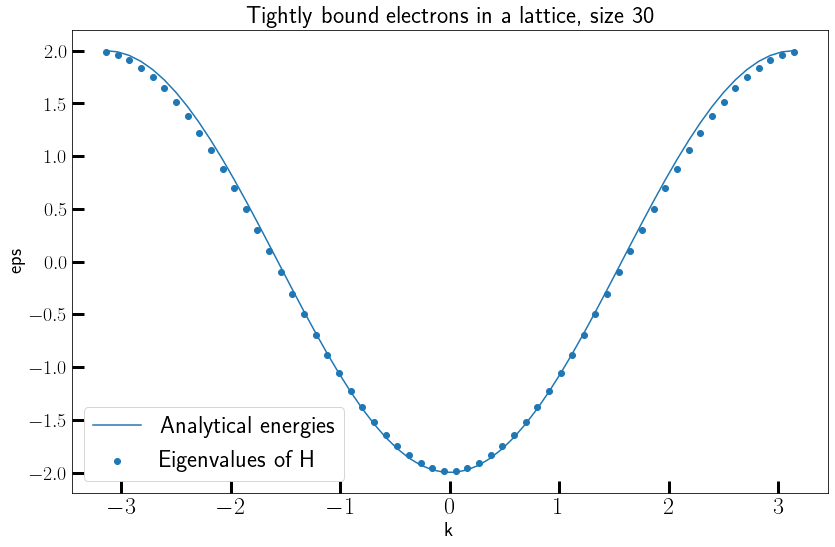

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 20
k = np.linspace(-np.pi, np.pi, 2*N)

#plt.scatter(k[::3],numerical[::3].real, label='Eigenvalues of H')
plt.scatter(k,numerical.real, label='Eigenvalues of H')

analytical = -2 * np.cos(k)
plt.title(f"Tightly bound electrons in a lattice, size {N}")
plt.plot(k,analytical, label='Analytical energies')
plt.xlabel("k")
plt.ylabel("eps")
plt.legend()
plt.show()

## Systems of Fermions in QuTiP

Fermions are a little harder to simulate in `QutiP`, but they can be done. Consider a system of $N$ coupled spin-$1/2$ particles. The Hamiltonian is given by

\begin{equation*}
H = \sum^{N-1}_{i=0}\omega_i \sigma^z_i +  g\sum^{N-1}_{i=0}\sigma^x_i\sigma^x_{i+1}
\end{equation*}

We have to be a little careful with our choice of $N$, since the dimensions of the Hamiltonian scale as $2^N\times 2^N$, so if our $N$ is too large, we'll swiftly run out of computer memory *and* disk space. This happens because each spin-$1/2$ has a Hilbert space dimension of $2$, and the terms in the sum above are actually shorthand for the full exact operators, which involve tensor products with unity at the empty sites, thus, a term like $\sigma^x_i\sigma^x_{i+1}$ will actually become a full tensor product of $N-2$ unit matrices and two $\sigma_x$s. For example, in a system 
of $5$ such fermions

\begin{align*}
\sigma^x_0\sigma^x_1 & \rightarrow \sigma^x \otimes\sigma^x \otimes \mathbf{1}\otimes \mathbf{1}\otimes \mathbf{1}\\
\sigma^x_1\sigma^x_2 & \rightarrow \mathbf{1}\otimes \sigma^x \otimes\sigma^x \otimes \mathbf{1}\otimes \mathbf{1}\\
\dots & \dots \\
\sigma^x_3\sigma^x_4 &\rightarrow \mathbf{1}\otimes \mathbf{1}\otimes \mathbf{1}\otimes \sigma^x \otimes\sigma^x \\
\dots & \dots \\
\sigma^z_0&\rightarrow \sigma^z \otimes \mathbf{1}\otimes \mathbf{1}\otimes \mathbf{1} \otimes\mathbf{1}\\
\sigma^z_1&\rightarrow \mathbf{1}\otimes\sigma^z \otimes \mathbf{1}\otimes \mathbf{1}\otimes \mathbf{1} \\
\sigma^z_2&\rightarrow \mathbf{1}\otimes \mathbf{1}\otimes \sigma^z\otimes \mathbf{1} \otimes\mathbf{1}\\
\dots & \dots
\end{align*}

Let us keep $N<11$. Suppose $N=3$. Let us vary $\omega_1$ and keep everything else fixed, and plot the energy eigenvalues as functions of $\omega_1$ using `QuTiP`. The $\otimes$ operation can be done using the `tensor()` function, and the identity $\mathbf{1}$ can be obtained from the `qeye()` function.

In [ ]:
def evals_multw(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())
  
    evals_mat = np.zeros((len(w1list),2**3))
    for idx, w1 in enumerate(w1list):
        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 +\
            g12 * sx1 * sx2 + g13 * sx1 * sx3
        # find the energy eigenvalues of the composite system
        evals = H.eigenenergies()
        evals_mat[idx,:] = np.real(evals)

    return evals_mat

In [ ]:
w1  = 1.0 * 2 * np.pi   # atom 1 frequency: sweep this one
w2  = 0.9 * 2 * np.pi   # atom 2 frequency
w3  = 1.1 * 2 * np.pi   # atom 3 frequency
g12 = 0.05 * 2 * np.pi   # atom1-atom2 coupling strength
g13 = 0.05 * 2 * np.pi   # atom1-atom3 coupling strength

w1list = np.linspace(0.75, 1.25, 50) * 2 * np.pi # atom 1 frequency range
evals_mat = evals_multw(w1list, w2, w3, g12, g13)

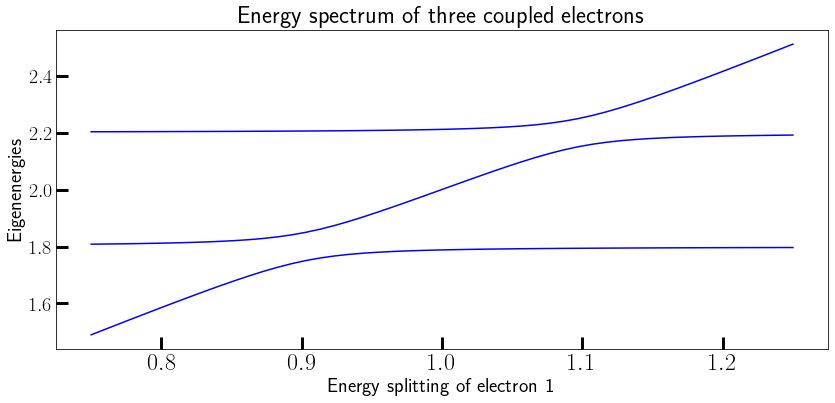

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(12,6))

for n in [1,2,3]:
    ax.plot(w1list / (2*np.pi), (evals_mat[:,n]-evals_mat[:,0]) / (2*np.pi), 'b')

ax.set_xlabel('Energy splitting of electron 1')
ax.set_ylabel('Eigenenergies')
ax.set_title('Energy spectrum of three coupled electrons')
plt.show()

## Unitary dynamics

Unitary evolution of a quantum system in `QuTiP` can be calculated with the `mesolve` function. This solves the Schrodinger equation

\begin{equation*}
H|\psi\rangle = i \frac{d}{dt}|\psi\rangle,
\end{equation*}

using prebuilt numerical methods. The name `mesolve` is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schr\"odinger equation.

The evolution solvers in QuTiP returns a class of type `Odedata`, which contains the solution to the problem posed to the evolution solver. 

For example, considor a single spin-$1/2$ particle with Hamiltonian $H = \sigma_x$ and initial state $\left|1\right>$ (in the $\sigma_z-$basis): Its evolution can be calculated as follows:

In [ ]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])
print(result)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


In [ ]:
result.states[-1] # the finial state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.8390774+0.j        ]
 [ 0.       +0.54401206j]]

### Expectation values

The expectation values of an operator given a state vector or density matrix (or list thereof) can be calculated using the `expect` function. 

In [ ]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

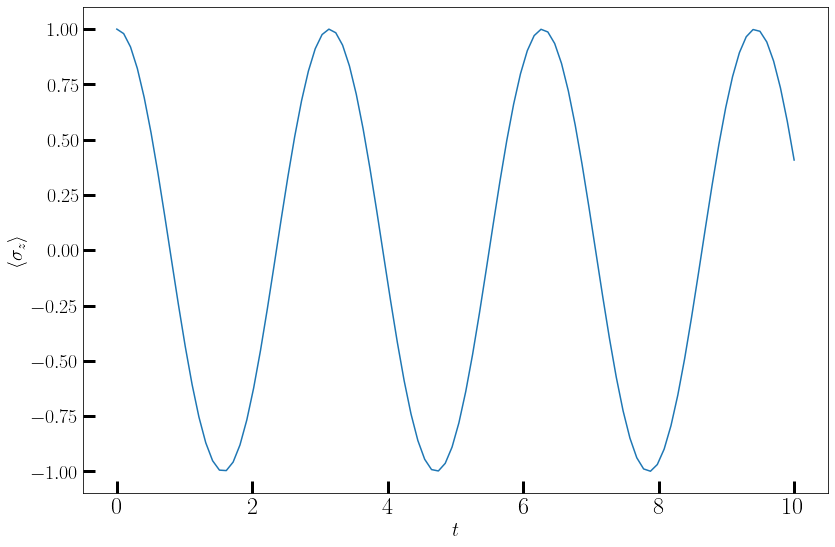

In [ ]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);